In [1]:
import pandas as pd
from os import listdir
from datetime import datetime
import numpy as np



def read_comsumption_file(group_id):
    file_list = listdir("consumption_power")
    group_no_id_list = [f[:5] for f in file_list]
    consumption_power_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("consumption_power/"+consumption_power_name)

def read_meteo_data_file(group_id):
    file_list = listdir("meteo_data")
    group_no_id_list = [f[-9:-4] for f in file_list]
    meteo_data_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("meteo_data/"+meteo_data_name)


def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

def set_dates(df):
    df["datetime"] = [read_date(date) for date in df.timestamp]
    df["date"] = [d.date() for d in df["datetime"]]

# def change_scale(df,n,param):
#     """plot the parameter data sum on a given time 
#     ex : n=48 gives the sum for each day"""
#     df[param+"_sum"] = df[param].rolling(n).sum()
#     return df[n::n][param+"_sum"].reset_index()[param+"_sum"]

def change_scale(df):
    """return the aggregation by day"""
    df_by_date = df.groupby("date").agg("sum").reset_index()
    return df_by_date

file_list = listdir("consumption_power")
groups_no_prod = pd.read_csv("groups_no_prod.csv")
group_id_0 = groups_no_prod

file_list = listdir("consumption_power")
group_no_id_list = [f[:5] for f in file_list] #remove the first last caracters to keep the group n0

In [2]:
#read data
n0 = 4
group_id_no = str(groups_no_prod.group_id[n0])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

#set dates
set_dates(meteo_df)
set_dates(consumption_df)

In [3]:
print(consumption_df.columns)
print(meteo_df.columns)

Index(['filter_mva', 'filter_mw', 'filtered_manual_int', 'gen', 'net_mw',
       'time_zone_offset', 'timestamp', 'underlying_mw', 'datetime', 'date'],
      dtype='object')
Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id', 'datetime', 'date'],
      dtype='object')


In [4]:
consumption_df.head()

,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,timestamp,underlying_mw,datetime,date
0,0.0,0.0,1.0,0,22.651,1,2016-04-01 00:30:00,22.651,2016-04-01 00:30:00,2016-04-01
1,0.0,0.0,1.0,0,21.023,1,2016-04-01 01:00:00,21.023,2016-04-01 01:00:00,2016-04-01
2,0.0,0.0,1.0,0,19.646,1,2016-04-01 01:30:00,19.646,2016-04-01 01:30:00,2016-04-01
3,0.0,0.0,1.0,0,19.126,1,2016-04-01 02:00:00,19.126,2016-04-01 02:00:00,2016-04-01
4,0.0,0.0,1.0,0,19.058,1,2016-04-01 02:30:00,19.058,2016-04-01 02:30:00,2016-04-01


In [5]:
meteo_df.head()

,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime,date
0,0.000024,99.0,2018-07-12 16:00:00,290.392016,0.88,0.49,82024,2018-07-12 16:00:00,2018-07-12
1,0.000067,100.0,2018-01-13 13:00:00,276.980016,-4.18,1.32,82024,2018-01-13 13:00:00,2018-01-13
2,0.000000,60.0,2018-07-14 16:00:00,292.771016,2.71,4.86,82024,2018-07-14 16:00:00,2018-07-14
3,0.000000,71.0,2018-01-12 22:00:00,275.084016,-4.67,1.88,82024,2018-01-12 22:00:00,2018-01-12
4,0.000025,99.0,2018-07-12 15:00:00,290.733016,0.66,0.80,82024,2018-07-12 15:00:00,2018-07-12


In [6]:
consumption_df.describe()

,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,underlying_mw
count,79675.000000,79675.000000,68419.000000,79682.0,79682.000000,79682.000000,79682.000000
mean,0.134798,0.067399,0.150148,0.0,23.133900,0.635978,23.133900
std,1.236866,0.618433,0.357219,0.0,6.376673,0.481158,6.376673
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,18.738000,0.000000,18.738000
50%,0.000000,0.000000,0.000000,0.0,23.103000,1.000000,23.103000
75%,0.000000,0.000000,0.000000,0.0,27.389000,1.000000,27.389000
max,12.000000,6.000000,1.000000,0.0,43.339000,1.000000,43.339000


In [7]:
meteo_df.index = meteo_df['datetime']
consumption_df.index = consumption_df['datetime']
consumption_df_resampled = consumption_df.resample("1h").sum()[1:]
merged_df = pd.merge(meteo_df,consumption_df_resampled, how='inner', left_index=True, right_index=True,sort =True)
merged_df.head()

,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime,date,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,underlying_mw
datetime,,,,,,,,,,,,,,,,
2016-04-01 01:00:00,0.000000,68.0,2016-04-01 01:00:00,276.874000,-0.49,5.27,82024,2016-04-01 01:00:00,2016-04-01,0.0,0.0,2.0,0,40.669,2,40.669
2016-04-01 02:00:00,0.000000,79.0,2016-04-01 02:00:00,277.334016,-0.86,5.39,82024,2016-04-01 02:00:00,2016-04-01,0.0,0.0,2.0,0,38.184,2,38.184
2016-04-01 03:00:00,0.000000,84.0,2016-04-01 03:00:00,277.581000,-0.51,5.38,82024,2016-04-01 03:00:00,2016-04-01,0.0,0.0,2.0,0,38.077,2,38.077
2016-04-01 04:00:00,0.000000,88.0,2016-04-01 04:00:00,277.933016,-0.08,5.81,82024,2016-04-01 04:00:00,2016-04-01,0.0,0.0,2.0,0,37.062,2,37.062
2016-04-01 05:00:00,0.000001,89.0,2016-04-01 05:00:00,277.916016,0.26,6.15,82024,2016-04-01 05:00:00,2016-04-01,0.0,0.0,2.0,0,36.825,2,36.825


In [39]:
#features 

#features list :
#   time features : hour, weekday, month, season ?
#   consumption features : mean past week, delta mean past weeks, delta² ?
#   meteo features : tmp2m, wnd10m_u, wnd10m_v, tcdcclm, prate



df_X = merged_df["datetime"]
#time 
merged_df["date"] = merged_df["date"]
merged_df["hour"] = [d.hour for d in merged_df["datetime"]]
merged_df["weekday"] = [d.weekday() for d in merged_df["datetime"]]
merged_df["month"] = [d.month for d in merged_df["datetime"]]
merged_df["year"] = [d.year for d in merged_df["datetime"]]
#meteo
merged_df["wnd"] = np.sqrt(merged_df["wnd10m_u"]**2+merged_df["wnd10m_v"]**2)
#consumption
n_day_mean = 7
n_day_pred = 5
#mean mw of the week 5 days before
merged_df["mean_mw_past_week"] = merged_df["underlying_mw"].rolling(24*n_day_mean).mean().shift(24*n_day_pred) 
merged_df = merged_df[(n_day_pred+n_day_mean)*24:]

In [40]:
# merged_df[merged_df.mean_mw_past_week.isna()]

In [42]:
merged_df.isna().sum().sum()

0

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
n_pred = 24*5

def get_average_error(y_test,pred, n_pred = n_pred):
    rmse = mean_squared_error(y_test[:n_pred],pred[:n_pred],squared=False)
    error = rmse/(y_test.mean())
    return error

def features_importances(features,model):
    feat_importance = pd.DataFrame({"feat":features, "importance" : model.feature_importances_})
    return feat_importance

def plot_results(y_test,pred):
    n_pred =n_day_pred*24

    plt.plot(y_test[:n_pred])
    plt.plot(pred[:n_pred])

def train_model(features):

    print(features)
    X = merged_df[features]
    Y = merged_df["underlying_mw"]

    i_split = int(len(X)*0.8)
    print("split on " , merged_df.date[i_split])

    # i_split=3200
    X_train = X[:i_split].values
    y_train = Y[:i_split].values
    X_test = X[i_split:].values
    y_test = Y[i_split:].values

    model = RandomForestRegressor(min_samples_leaf=5)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return model, X_train,y_train,X_test,y_test,pred




0.05196602381704912

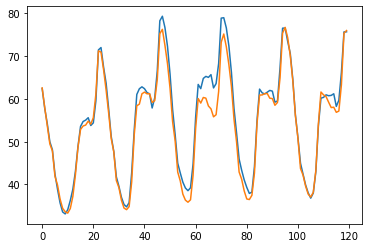

In [51]:
#baseline pred = previous week
base = y_train[-24*7:-24*2]

plt.plot(y_test[:n_pred])
plt.plot(base[:])
get_average_error(y_test,base)

['hour', 'weekday', 'month', 'year']
split on  2019-11-16
avg errror 0.07013981460772405


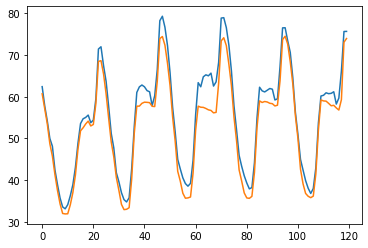

In [52]:
#features = time
time_features=["hour", "weekday", "month","year"]
consumption_features=[]
meteo_features=[]

features = time_features+consumption_features+meteo_features
model, X_train,y_train,X_test,y_test,pred = train_model(features)

print("avg errror" , get_average_error(y_test,pred))
plot_results(y_test,pred)

['hour', 'weekday', 'month', 'year', 'tmp2m', 'wnd', 'tcdcclm', 'prate']
split on  2019-11-16
avg errror 0.04741527920218583


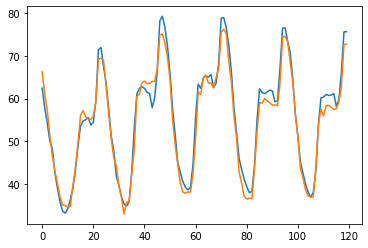

In [53]:
#features = time and meteo
time_features=["hour", "weekday", "month","year"]
consumption_features=[]
meteo_features=["tmp2m", "wnd", "tcdcclm", "prate"]

features = time_features+consumption_features+meteo_features
model, X_train,y_train,X_test,y_test,pred = train_model(features)

print("avg errror" , get_average_error(y_test,pred))
plot_results(y_test,pred)

['hour', 'weekday', 'month', 'year', 'mean_mw_past_week', 'tmp2m', 'wnd', 'tcdcclm', 'prate']
split on  2019-11-16
avg errror 0.03806266888876194


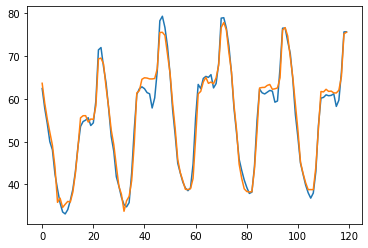

In [54]:
#features = time + meteo + consumption
time_features=["hour", "weekday", "month","year"]
consumption_features=["mean_mw_past_week"]
meteo_features=["tmp2m", "wnd", "tcdcclm", "prate"]

features = time_features+consumption_features+meteo_features

model, X_train,y_train,X_test,y_test,pred = train_model(features)
print("avg errror" , get_average_error(y_test,pred))
plot_results(y_test,pred)

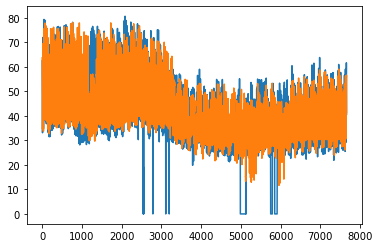

In [55]:
plt.plot(y_test[:])
plt.plot(pred[:])

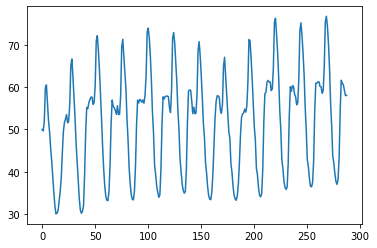

In [56]:
#variation autour de la période de split train/test
i_split = int(len(X)*0.8)
plt.plot(Y.values[i_split-24*7:i_split+24*5])

# XGBoost

In [57]:
def split_train_test(X,Y,i_split = int(len(X)*0.8)):
    X_train = X[:i_split].values
    y_train = Y[:i_split].values
    X_test = X[i_split:].values
    y_test = Y[i_split:].values
    
    return X_train,y_train,X_test,y_test

In [58]:
import xgboost as xgb 

time_features=["hour", "weekday", "month","year"]
consumption_features=["mean_mw_past_week"]
meteo_features=["tmp2m", "wnd", "tcdcclm", "prate"]
features = time_features+consumption_features+meteo_features
features = time_features + consumption_features

X = merged_df[features]
Y = merged_df["underlying_mw"]

X_train,y_train,X_test,y_test =split_train_test(X,Y)

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (get_average_error(y_test,preds)))

RMSE: 0.035017


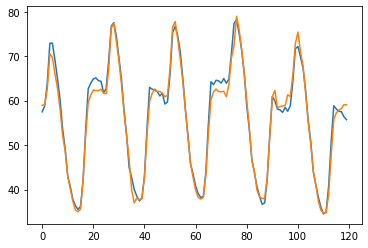

In [59]:
plt.plot(y_test[:n_pred])
plt.plot(preds[:n_pred])

# Tensorflow part

In [60]:
import tensorflow as tf


ImportError: Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: Le module spécifié est introuvable.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [61]:
lstm = tf.keras.layers.LSTM(4)
inputs = tf.random.normal([32, 10, 8])
output = lstm(inputs)

NameError: name 'tf' is not defined

In [93]:
index_y = list(tt.columns).index("underlying_mw")
# print(tt.head().iloc[0])
tt.values[0,15]

42.182

In [138]:
tt.columns

Index(['datetime', 'prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u',
       'wnd10m_v', 'group_id', 'date', 'filter_mva', 'filter_mw',
       'filtered_manual_int', 'gen', 'net_mw', 'time_zone_offset',
       'underlying_mw', 'hour', 'weekday', 'month', 'year', 'wnd',
       'mean_mw_past_week'],
      dtype='object')

In [137]:
tt.head()

,datetime,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,date,filter_mva,...,gen,net_mw,time_zone_offset,underlying_mw,hour,weekday,month,year,wnd,mean_mw_past_week
0,2016-04-13 01:00:00,0.000021,99.0,2016-04-13 01:00:00,277.740016,-3.47,-2.28,82024,2016-04-13,0.0,...,0,42.182,2,42.182,1,2,4,2016,4.152024,50.100500
1,2016-04-13 02:00:00,0.000039,99.0,2016-04-13 02:00:00,277.767016,-3.09,-2.32,82024,2016-04-13,0.0,...,0,40.120,2,40.120,2,2,4,2016,3.864001,50.096143
2,2016-04-13 03:00:00,0.000061,99.0,2016-04-13 03:00:00,277.738016,-2.78,-2.41,82024,2016-04-13,0.0,...,0,39.206,2,39.206,3,2,4,2016,3.679198,50.094435
3,2016-04-13 04:00:00,0.000066,99.0,2016-04-13 04:00:00,277.691016,-2.57,-2.44,82024,2016-04-13,0.0,...,0,38.839,2,38.839,4,2,4,2016,3.543797,50.094571
4,2016-04-13 05:00:00,0.000065,100.0,2016-04-13 05:00:00,277.651016,-2.56,-2.51,82024,2016-04-13,0.0,...,0,39.534,2,39.534,5,2,4,2016,3.585206,50.092929


In [179]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_tt = scaler.fit_transform(tt)

array([[1.17449664e-02, 9.90000000e-01, 3.10720646e-01, ...,
        0.00000000e+00, 2.20867585e-01, 6.66120851e-01],
       [2.18120805e-02, 9.90000000e-01, 3.11544596e-01, ...,
        0.00000000e+00, 2.05463189e-01, 6.65971882e-01],
       [3.41163311e-02, 9.90000000e-01, 3.10659613e-01, ...,
        0.00000000e+00, 1.95579374e-01, 6.65913474e-01],
       ...,
       [5.59284116e-04, 9.00000000e-01, 2.88596067e-01, ...,
        1.00000000e+00, 3.24595793e-01, 7.68923171e-01],
       [1.11856823e-03, 9.20000000e-01, 3.00833248e-01, ...,
        1.00000000e+00, 3.32438090e-01, 7.68942097e-01],
       [6.15212528e-03, 9.90000000e-01, 3.06387280e-01, ...,
        1.00000000e+00, 2.64070504e-01, 7.69006610e-01]])

In [13]:
dataset_lstm.head()

,underlying_mw,hour,weekday,month,year,tmp2m,prate
datetime,,,,,,,
2016-04-13 01:00:00,42.182,1,2,4,2016,277.740016,0.000021
2016-04-13 02:00:00,40.120,2,2,4,2016,277.767016,0.000039
2016-04-13 03:00:00,39.206,3,2,4,2016,277.738016,0.000061
2016-04-13 04:00:00,38.839,4,2,4,2016,277.691016,0.000066
2016-04-13 05:00:00,39.534,5,2,4,2016,277.651016,0.000065


In [10]:
# import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    index_y = list(tt.columns).index("underlying_mw")

    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :index_y], sequences[end_ix-1:out_end_ix, index_y]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

time_features=["hour", "weekday", "month","year"]
consumption_features=["mean_mw_past_week"]
meteo_features=["tmp2m", "wnd", "tcdcclm", "prate"]
features = time_features

dataset_lstm = merged_df[["underlying_mw","hour", "weekday", "month","year","tmp2m","prate"]]

#split train test
i_split = int(len(merged_df)*0.8)
train = dataset_lstm[:i_split]
test = dataset_lstm[i_split:]

# to_drop = ["datetime","timestamp","date"]
# tt = train.drop("datetime",axis = 1).reset_index().drop(to_drop,axis=1)

tt = train.reset_index().drop("datetime",axis = 1)

scaler = MinMaxScaler()
scaled_tt = pd.DataFrame(scaler.fit_transform(tt),columns = tt.coluns)
ttrain=scaled_tt[:2000]
ttest=scaled_tt[2000:3000]
print(ttrain.shape)

look_back = 24*7
look_forward =24*5
    
trainX,trainY = split_sequences(ttrain,look_back,look_forward)
testX,testY = split_sequences(ttest,look_back,look_forward)

# the dataset knows the number of features, e.g. 2
n_features = trainX.shape[2]
# define model
dropout = 0.001
model = Sequential()
model.add(LSTM(40, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
# model.add(Dropout(dropout))
model.add(LSTM(40, activation='relu'))
model.add(Dense(look_forward))
model.compile(optimizer='adam', loss='mse')

# fit model
# es =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode ='min',verbose = 1, patience = 5)
# model.fit(trainX,trainY, epochs=10, validation_split=0.15, callbacks = [es], batch_size = 1024)
model.fit(trainX,trainY, epochs=10,verbose=1)

# demonstrate prediction

# preds = model.predict(testX, verbose=0)


(2000, 7)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [198]:
preds = model.predict(testX, verbose=0)


In [14]:
scaled_tt = pd.DataFrame(scaler.fit_transform(tt),columns = tt.columns)

scaled_tt

,underlying_mw,hour,weekday,month,year,tmp2m,prate
0,0.491649,0.043478,0.333333,0.272727,0.0,0.310721,0.011745
1,0.467615,0.086957,0.333333,0.272727,0.0,0.311545,0.021812
2,0.456962,0.130435,0.333333,0.272727,0.0,0.310660,0.034116
3,0.452685,0.173913,0.333333,0.272727,0.0,0.309225,0.036913
4,0.460785,0.217391,0.333333,0.272727,0.0,0.308005,0.036353
...,...,...,...,...,...,...,...
31328,0.613122,0.391304,0.833333,0.909091,1.0,0.240166,0.000559
31329,0.658962,0.434783,0.833333,0.909091,1.0,0.267875,0.000559
31330,0.675408,0.478261,0.833333,0.909091,1.0,0.288596,0.000559
31331,0.674942,0.521739,0.833333,0.909091,1.0,0.300833,0.001119


<Figure size 432x288 with 0 Axes>

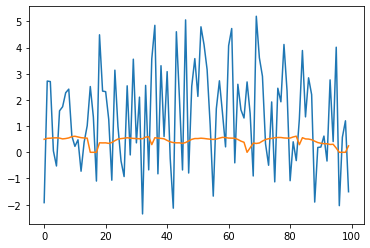

<Figure size 432x288 with 0 Axes>

In [199]:
preds = model.predict(testX, verbose=0)
preds
plt.plot(preds.flatten()[:100])
# plt.figure()
plt.plot(testY.flatten()[:100])
plt.figure()

In [ ]:
plt.plot(preds)
plt.show()
plt.plot(testY)
plt.show()

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)

In [33]:
inputs.shape
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


#split train test
train = merged_df[:i_split]
test = merger_df[i_split:]


def lstm_data_transform(x_data,e,num_steps = 24*7) : 
  x,y = list(),list()
  for i in range(x_data.shape[0]) : 
    end_ix = i+num_steps
    if (end_ix + 24*6)>= x_data.shape[0] : 
      break
    seq_x = x_data[i:end_ix].values
    seq_y = x_data.loc[end_ix:end_ix + 24*6,TARGET]
    x.append(seq_x)
    y.append(seq_y)
  x_array = np.array(x)
  y_array = np.array(y)
  return x_array , y_array


# reshape into X=t and Y=t+lookback
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

look_back=1
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (31333, 9)